In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!ls /content/drive/MyDrive/data

Meander  Spiral


In [17]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

In [44]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

In [45]:
import os

base_dir = "/content/drive/MyDrive/data"

data_paths = {
    "spiral_control": os.path.join(base_dir, "Spiral", "SpiralControl"),
    "spiral_patients": os.path.join(base_dir, "Spiral", "SpiralPatients"),
    "meander_control": os.path.join(base_dir, "Meander", "MeanderControl"),
    "meander_patients": os.path.join(base_dir, "Meander", "MeanderPatients"),
}

spiral_controls_path = data_paths["spiral_control"]
meander_patients_path = data_paths["meander_patients"]
spiral_patients_path = data_paths["spiral_patients"]
meander_controls_path = data_paths["meander_control"]

In [46]:
def check_corrupted_images(folder_path):
    corrupted_images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()
        except Exception as e:
            corrupted_images.append((filename, str(e)))
    return corrupted_images

corrupted_spiral_controls = check_corrupted_images(spiral_controls_path)
corrupted_spiral_patients = check_corrupted_images(spiral_patients_path)

corrupted_meander_controls = check_corrupted_images(meander_controls_path)
corrupted_meander_patients = check_corrupted_images(meander_patients_path)

print("Corrupted images in MeanderControls:", corrupted_meander_controls)
print("Corrupted images in MeanderPatients:", corrupted_meander_patients)


print("Corrupted images in SpiralControls:", corrupted_spiral_controls)
print("Corrupted images in SpiralPatients:", corrupted_spiral_patients)

num_meander_controls = len(os.listdir(meander_controls_path))
num_meander_patients = len(os.listdir(meander_patients_path))
num_spiral_controls = len(os.listdir(spiral_controls_path))
num_spiral_patients = len(os.listdir(spiral_patients_path))

print("Number of images in spiral_controls:", num_spiral_controls)
print("Number of images in spiral_patients:", num_spiral_patients)
print("Number of images in meander_controls:", num_meander_controls)
print("Number of images in meander_patients:", num_meander_patients)

Corrupted images in MeanderControls: [('.DS_Store', "cannot identify image file '/content/drive/MyDrive/data/Meander/MeanderControl/.DS_Store'")]
Corrupted images in MeanderPatients: [('.DS_Store', "cannot identify image file '/content/drive/MyDrive/data/Meander/MeanderPatients/.DS_Store'")]
Corrupted images in SpiralControls: [('.DS_Store', "cannot identify image file '/content/drive/MyDrive/data/Spiral/SpiralControl/.DS_Store'")]
Corrupted images in SpiralPatients: [('.DS_Store', "cannot identify image file '/content/drive/MyDrive/data/Spiral/SpiralPatients/.DS_Store'")]
Number of images in spiral_controls: 73
Number of images in spiral_patients: 297
Number of images in meander_controls: 73
Number of images in meander_patients: 297


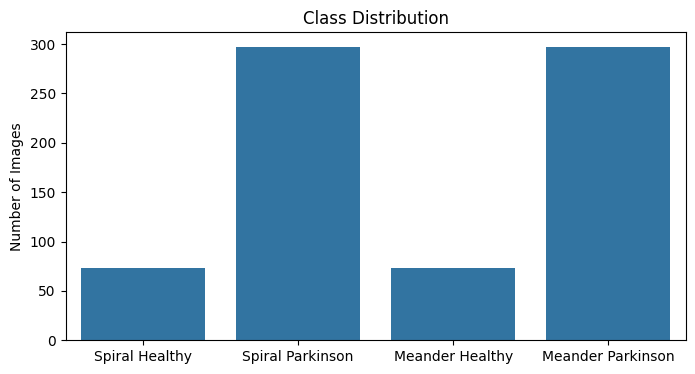

In [47]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x=["Spiral Healthy", "Spiral Parkinson", "Meander Healthy", "Meander Parkinson"],
    y=[num_spiral_controls, num_spiral_patients, num_meander_controls, num_meander_patients]
)
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()


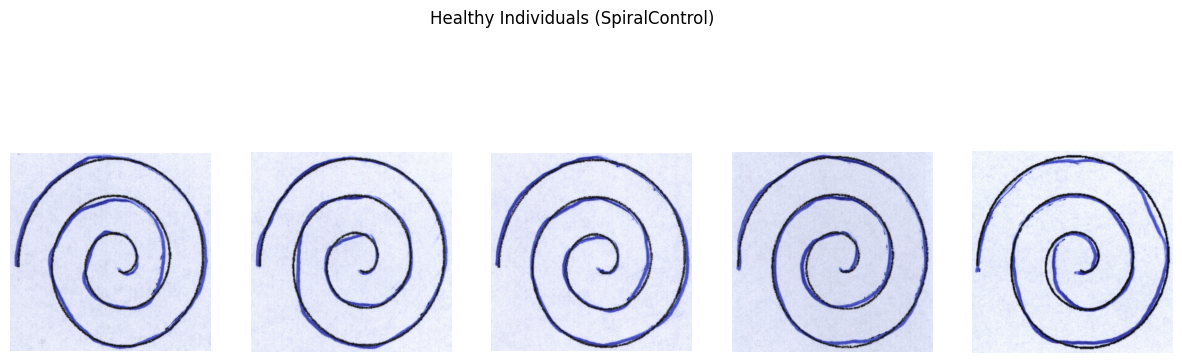

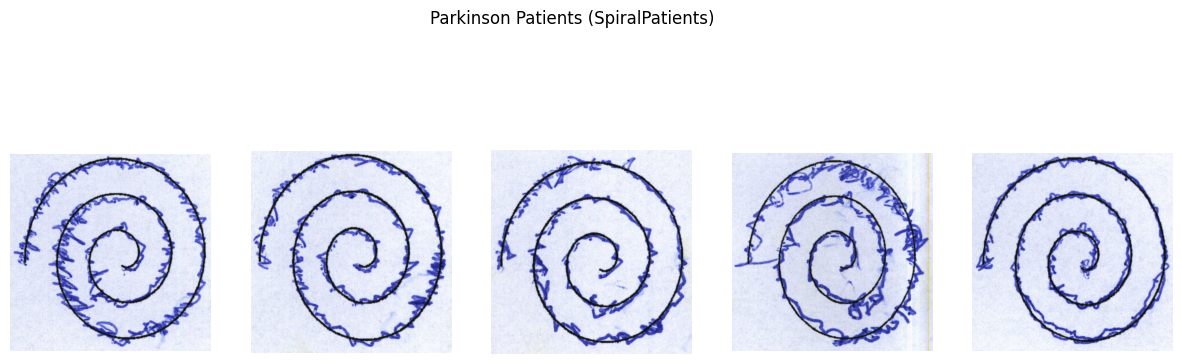

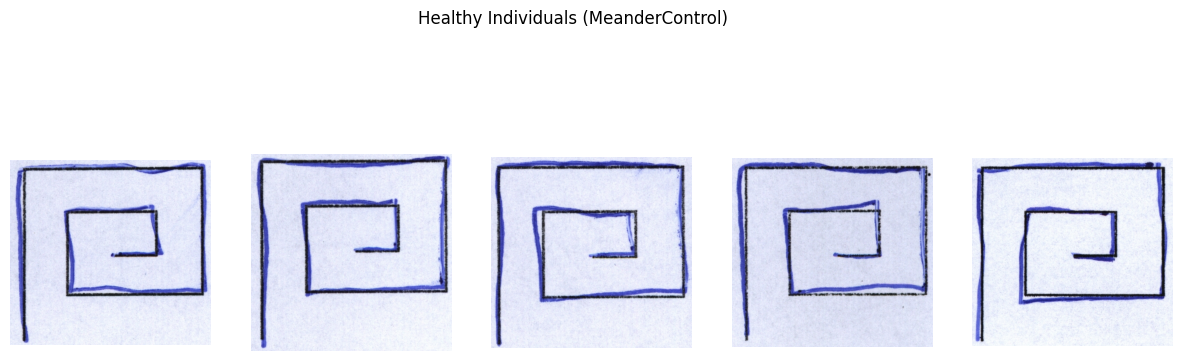

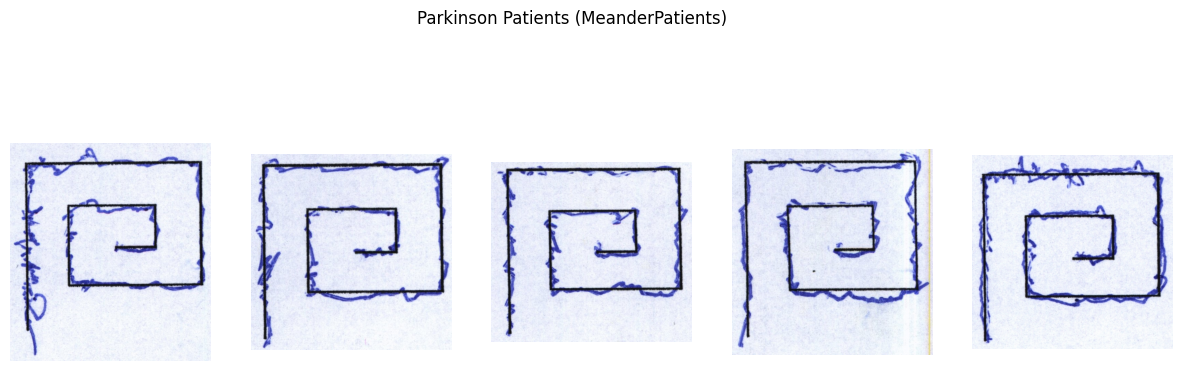

In [48]:
def display_sample_images(folder_path, title, num_samples=5):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

    num_samples = min(num_samples, len(image_files))

    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = os.path.join(folder_path, image_files[i])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.suptitle(title)
    plt.show()

display_sample_images(spiral_controls_path, "Healthy Individuals (SpiralControl)")
display_sample_images(spiral_patients_path, "Parkinson Patients (SpiralPatients)")
display_sample_images(meander_controls_path, "Healthy Individuals (MeanderControl)")
display_sample_images(meander_patients_path, "Parkinson Patients (MeanderPatients)")


In [49]:
label_map = {
    "spiral_control": 0,
    "spiral_patients": 1,
    "meander_control": 0,
    "meander_patients": 1
}

In [50]:
def load_and_labels(img_size=(128, 128)):
    images = []
    labels = []

    for category, path in data_paths.items():
        if not os.path.exists(path):
            print(f"Warning: {path} không tồn tại!")
            continue

        for file_name in os.listdir(path):
            file_path = os.path.join(path, file_name)

            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            img = cv2.resize(img, img_size)

            img = img / 255.0

            images.append(img)
            labels.append(label_map[category])

    return np.array(images), np.array(labels)

In [51]:
from sklearn.model_selection import train_test_split
X, y = load_and_labels(img_size=(128, 128))

X = X.reshape(-1, 128, 128, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Train size: (588, 128, 128, 1), Test size: (148, 128, 128, 1)
